In [1]:
!pip install qiskit qiskit-aer


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, unitary, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    unitary: unitary gate (to apply controlled operations)
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

In [3]:
def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

In [11]:
def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plt = plot_histogram(counts)
    display(plt)
    print(qc.draw(output='text'))

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125


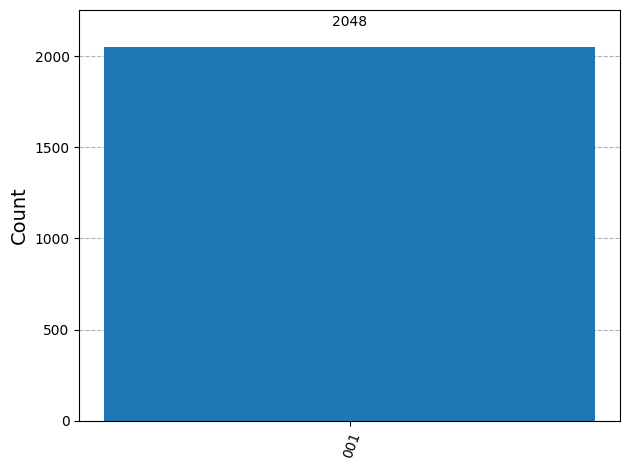

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

In [12]:
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

In [6]:
# Task_1 : Change the Phase Value Try different values of theta (e.g., 0.25, 0.375, 0.5) and see how the measured output changes.


Running QPE with θ = 0.25


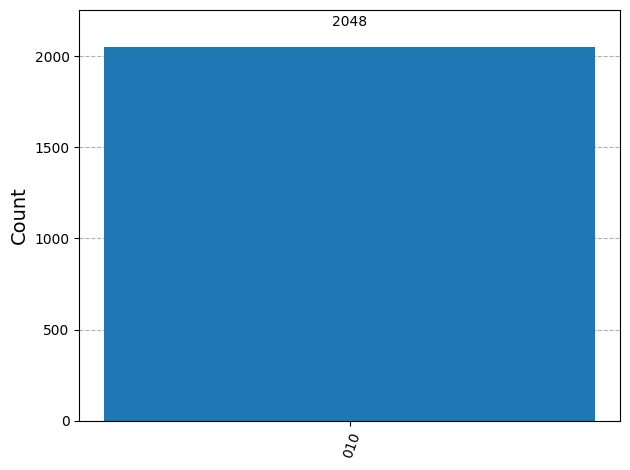

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─╫─┤M├
«    

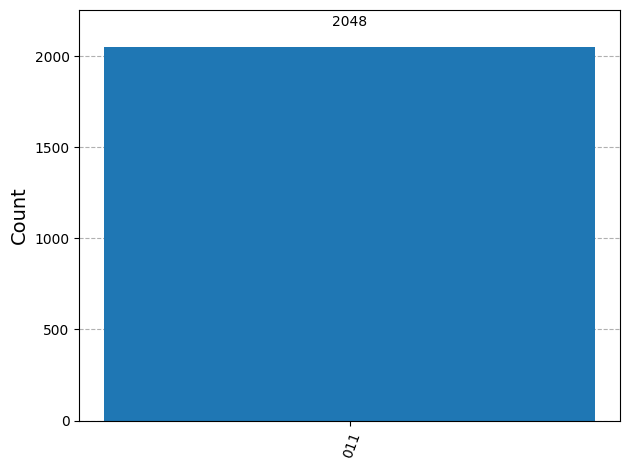

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────╫─┤ H ├─╫─┤M├
«          

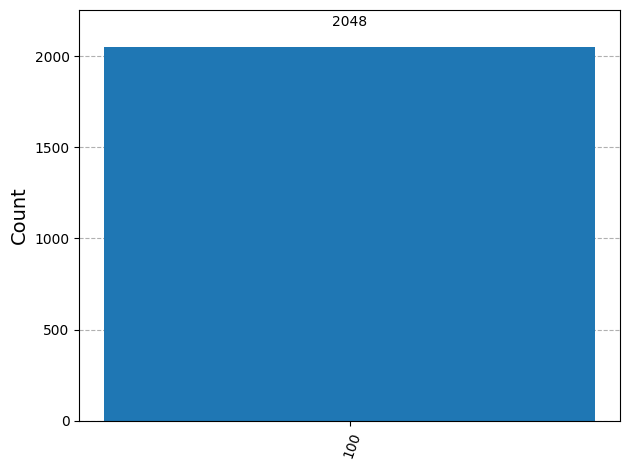

     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                
«q_0: ───────────
«          ┌─┐   
«q_1: ─────┤M├───
«     ┌───┐└╥┘┌─┐
«q_2: ┤ H ├─╫─┤M├
«

In [13]:
thetas = [0.25, 0.375, 0.5]  # different phase values to test
num_count_qubits = 3

for theta in thetas:
    print(f"\nRunning QPE with θ = {theta}")
    run_qpe(num_count_qubits=num_count_qubits, theta=theta)

In [ ]:
'''
When you change the phase value θ, the measured output (binary result from the counting qubits) shifts accordingly, representing the estimated phase in binary form.
'''

In [7]:
# Task_2 : Increase the Number of Counting Qubits Use 4 or 5 counting qubits for higher precision phase estimation.


Running QPE with 4 counting qubits and θ = 0.125


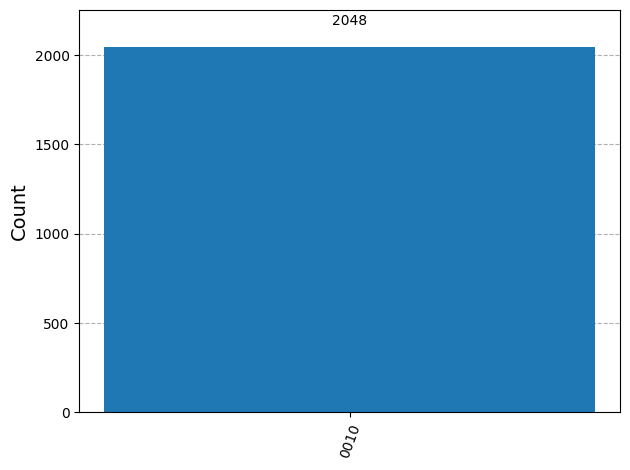

     ┌───┐                                    ┌───┐                         »
q_0: ┤ H ├─■────────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                                │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼────────■─────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │        │                 │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼────────┼────────■────────X─────┼──────────────────────■────────»
     ├───┤ │        │        │              │                               »
q_3: ┤ H ├─┼────────┼────────┼──────■───────X───────────────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)                                  »
q_4: ┤ X ├─■────────■────────■──────■───────────────────────────────────────»
     └───┘                                                                  »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                

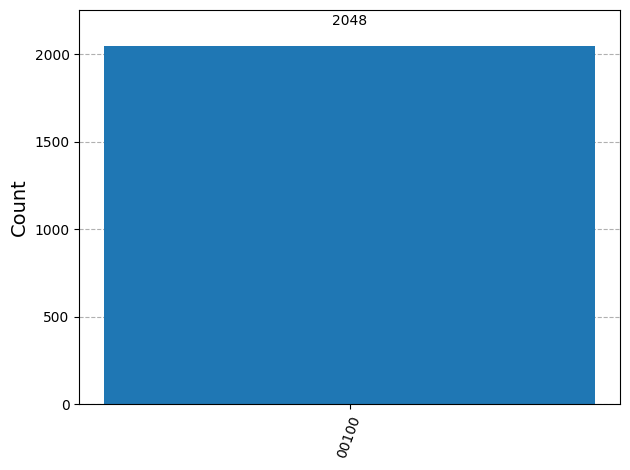

     ┌───┐                                            ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                        │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼────────■─────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │        │                         │     │                └───┘»
q_2: ┤ H ├─┼────────┼────────■────────────────┼─────┼─────────────────────»
     ├───┤ │        │        │                │     │                     »
q_3: ┤ H ├─┼────────┼────────┼──────■─────────X─────┼─────────────────────»
     ├───┤ │        │        │      │               │                     »
q_4: ┤ H ├─┼────────┼────────┼──────┼───────■───────X─────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)  │P(4π)                        »
q_5: ┤ X ├─■────────■────────■──────■───────■─────────────────────────────»
     └───┘                                                                »
c: 5/═══════

In [14]:
thetas = [0.125] 
num_qubits_list = [4, 5]  # try 4 and 5 counting qubits

for num_count_qubits in num_qubits_list:
    for theta in thetas:
        print(f"\nRunning QPE with {num_count_qubits} counting qubits and θ = {theta}")
        run_qpe(num_count_qubits=num_count_qubits, theta=theta)

In [ ]:
'''
When you increase the number of counting qubits, the Quantum Phase Estimation algorithm gains higher precision, meaning the measured binary output represents the phase with more bits of accuracy.
'''

In [8]:
# Task_3 : Compare with Theoretical Output Calculate the expected binary representation of the phase and compare with simulation results.

In [25]:
%matplotlib inline


--- QPE Comparison ---
Theta (actual phase): 0.125
Theoretical binary: 001
Measured binary:    100
Theoretical decimal: 0.125
Measured decimal:    0.500


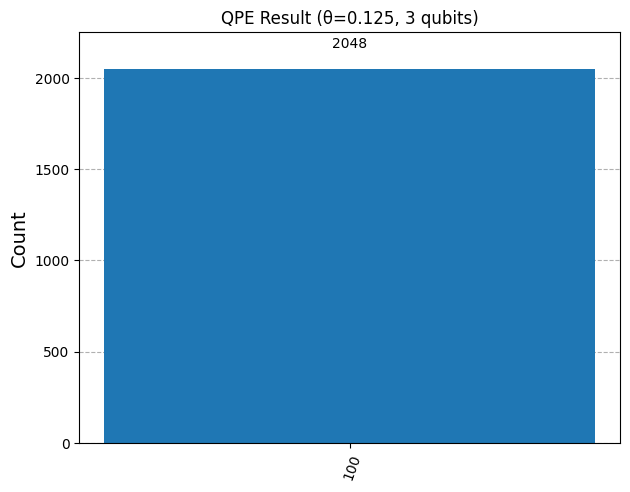


--- QPE Comparison ---
Theta (actual phase): 0.375
Theoretical binary: 0110
Measured binary:    0110
Theoretical decimal: 0.375
Measured decimal:    0.375


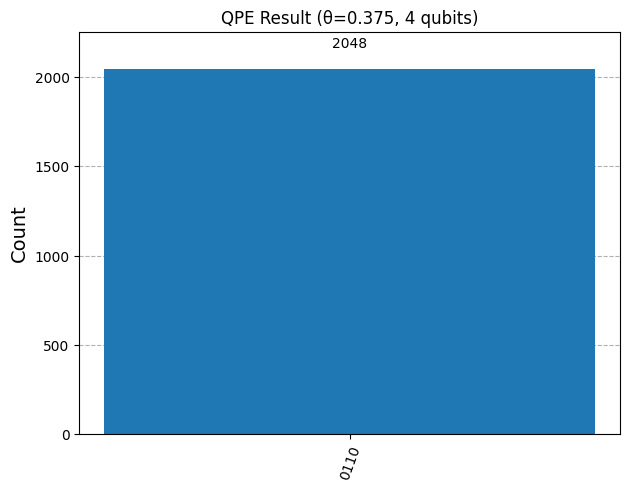

In [26]:
def compare_qpe_results(num_count_qubits=3, theta=0.125):
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    qc.measure(range(num_count_qubits), reversed(range(num_count_qubits)))
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()

    # Get the most frequent (measured) binary outcome
    measured_binary = max(counts, key=counts.get)
    measured_decimal = int(measured_binary, 2) / (2 ** num_count_qubits)

    # Theoretical phase estimation
    theoretical_decimal = theta % 1
    theoretical_binary = format(int(theoretical_decimal * (2 ** num_count_qubits)), f'0{num_count_qubits}b')

    print(f"\n--- QPE Comparison ---")
    print(f"Theta (actual phase): {theta}")
    print(f"Theoretical binary: {theoretical_binary}")
    print(f"Measured binary:    {measured_binary}")
    print(f"Theoretical decimal: {theoretical_decimal:.3f}")
    print(f"Measured decimal:    {measured_decimal:.3f}")

    plot_histogram(counts)
    plt.title(f"QPE Result (θ={theta}, {num_count_qubits} qubits)")
    plt.show()

# Example test runs
compare_qpe_results(num_count_qubits=3, theta=0.125)
compare_qpe_results(num_count_qubits=4, theta=0.375)

In [ ]:
'''
The theoretical output of Quantum Phase Estimation corresponds to the binary representation of 2^𝑛 × 𝜃, where n is the number of counting qubits.
By comparing this expected binary value with the most probable measured outcome, we can verify the correctness of the QPE algorithm
'''

In [9]:
# Task_4 : Inverse QFT Visualization Add a qc.draw('mpl') command before measurement to visualize the inverse QFT structure.

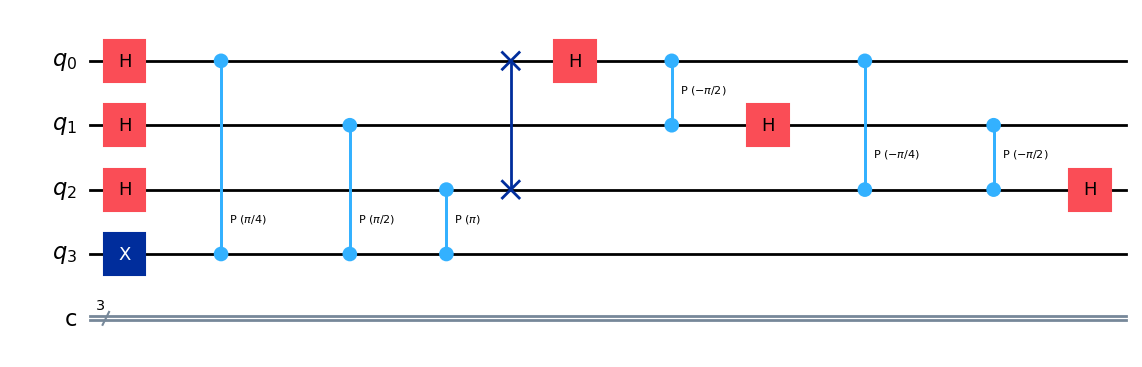

In [32]:
def qpe_circuit(num_count_qubits, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)
    qc.h(range(num_count_qubits))
    qc.x(num_count_qubits)

    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Apply inverse QFT
    inverse_qft(qc, num_count_qubits)

    # Visualization
    qc.draw('mpl')

    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

qc = qpe_circuit(3, 0.125)


In [ ]:
'''
The inverse QFT is the key step that transforms the phase-encoded state into a measurable binary form.
By calling qc.draw('mpl') before the measurement step, you can visually confirm its gate structure (Hadamards and controlled-phase gates).
'''

In [10]:
# Task_5 : Noise Simulation Introduce a NoiseModel using Qiskit Aer and observe how it affects accuracy.

In [36]:
def compare_qpe_results(num_count_qubits=3, theta=0.125):
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, theta)

    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()

    if not counts:
        print(qc.draw(output='text'))
        return

    measured_binary = max(counts, key=counts.get)
    measured_decimal = int(measured_binary, 2) / (2 ** num_count_qubits)

    theoretical_decimal = theta % 1
    theoretical_binary = format(int(theoretical_decimal * (2 ** num_count_qubits)), f'0{num_count_qubits}b')

    print("\n--- Quantum Phase Estimation Comparison ---")
    print(f"Theta (actual phase):   {theta}")
    print(f"Theoretical binary:      {theoretical_binary}")
    print(f"Measured binary:         {measured_binary}")
    print(f"Theoretical decimal:     {theoretical_decimal:.3f}")
    print(f"Measured decimal:        {measured_decimal:.3f}")

    plot_histogram(counts)
    plt.title(f"QPE Result (θ={theta}, {num_count_qubits} qubits)")
    plt.show()

Ideal QPE:

--- Quantum Phase Estimation Comparison ---
Theta (actual phase):   0.125
Theoretical binary:      001
Measured binary:         001
Theoretical decimal:     0.125
Measured decimal:        0.125


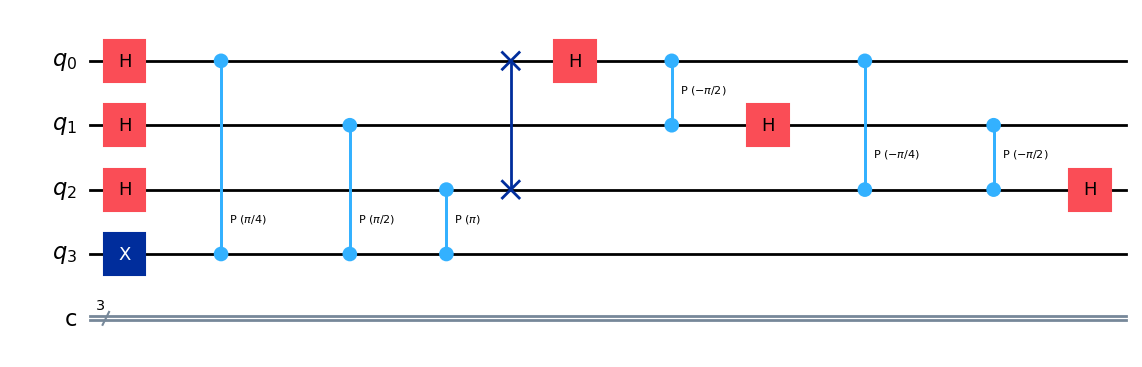

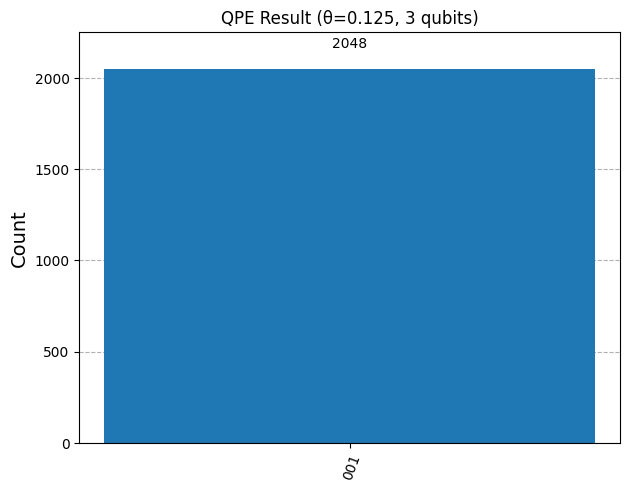


Noisy QPE:

--- QPE with Noise ---
Theta = 0.125, Counting Qubits = 3


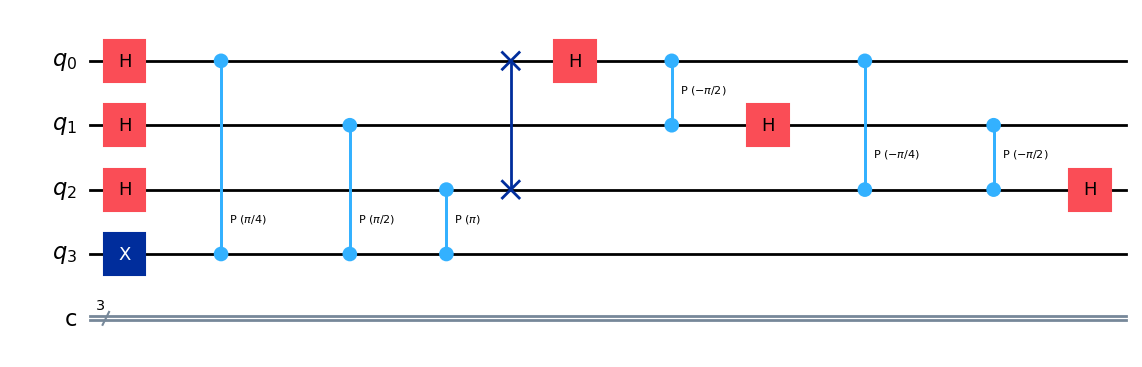

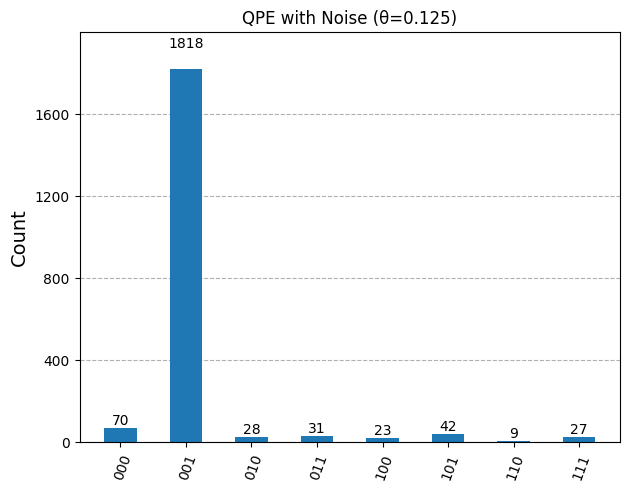

{'001': 1818,
 '000': 70,
 '100': 23,
 '010': 28,
 '111': 27,
 '101': 42,
 '110': 9,
 '011': 31}

In [37]:
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error

def run_qpe_with_noise(num_count_qubits=3, theta=0.125):
    qc = qpe_circuit(num_count_qubits, theta)

    # Define a simple noise model
    noise_model = NoiseModel()

    # Depolarizing noise for 1- and 2-qubit gates
    error1 = depolarizing_error(0.01, 1)
    error2 = depolarizing_error(0.02, 2)
    noise_model.add_all_qubit_quantum_error(error1, ['h', 'x'])
    noise_model.add_all_qubit_quantum_error(error2, ['cp'])

    # Create noisy simulator
    simulator = AerSimulator(noise_model=noise_model)

    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()

    print(f"\n--- QPE with Noise ---")
    print(f"Theta = {theta}, Counting Qubits = {num_count_qubits}")
    plot_histogram(counts)
    plt.title(f"QPE with Noise (θ={theta})")
    plt.show()

    return counts

# Run ideal vs noisy comparison
print("Ideal QPE:")
compare_qpe_results(num_count_qubits=3, theta=0.125)

print("\nNoisy QPE:")
run_qpe_with_noise(num_count_qubits=3, theta=0.125)

In [ ]:
'''
The NoiseModel in Qiskit Aer can simulate imperfections like:

Gate errors (bit-flip, depolarizing noise)

Readout errors (measurement mistakes)

Adding noise lets you see broader histograms and slightly incorrect peaks, mimicking real hardware performance.
'''